In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from cnnlearning import *
from learningutils import *
from patchextraction import *
from imageprosessing import *
from nearest_neighbors import *
from evaluation import *
from classificationutils import *
from sharedvariables import *
from vesseldetection import *

import os
video_sessions = get_video_sessions(should_have_marked_video=True)
vs = video_sessions[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


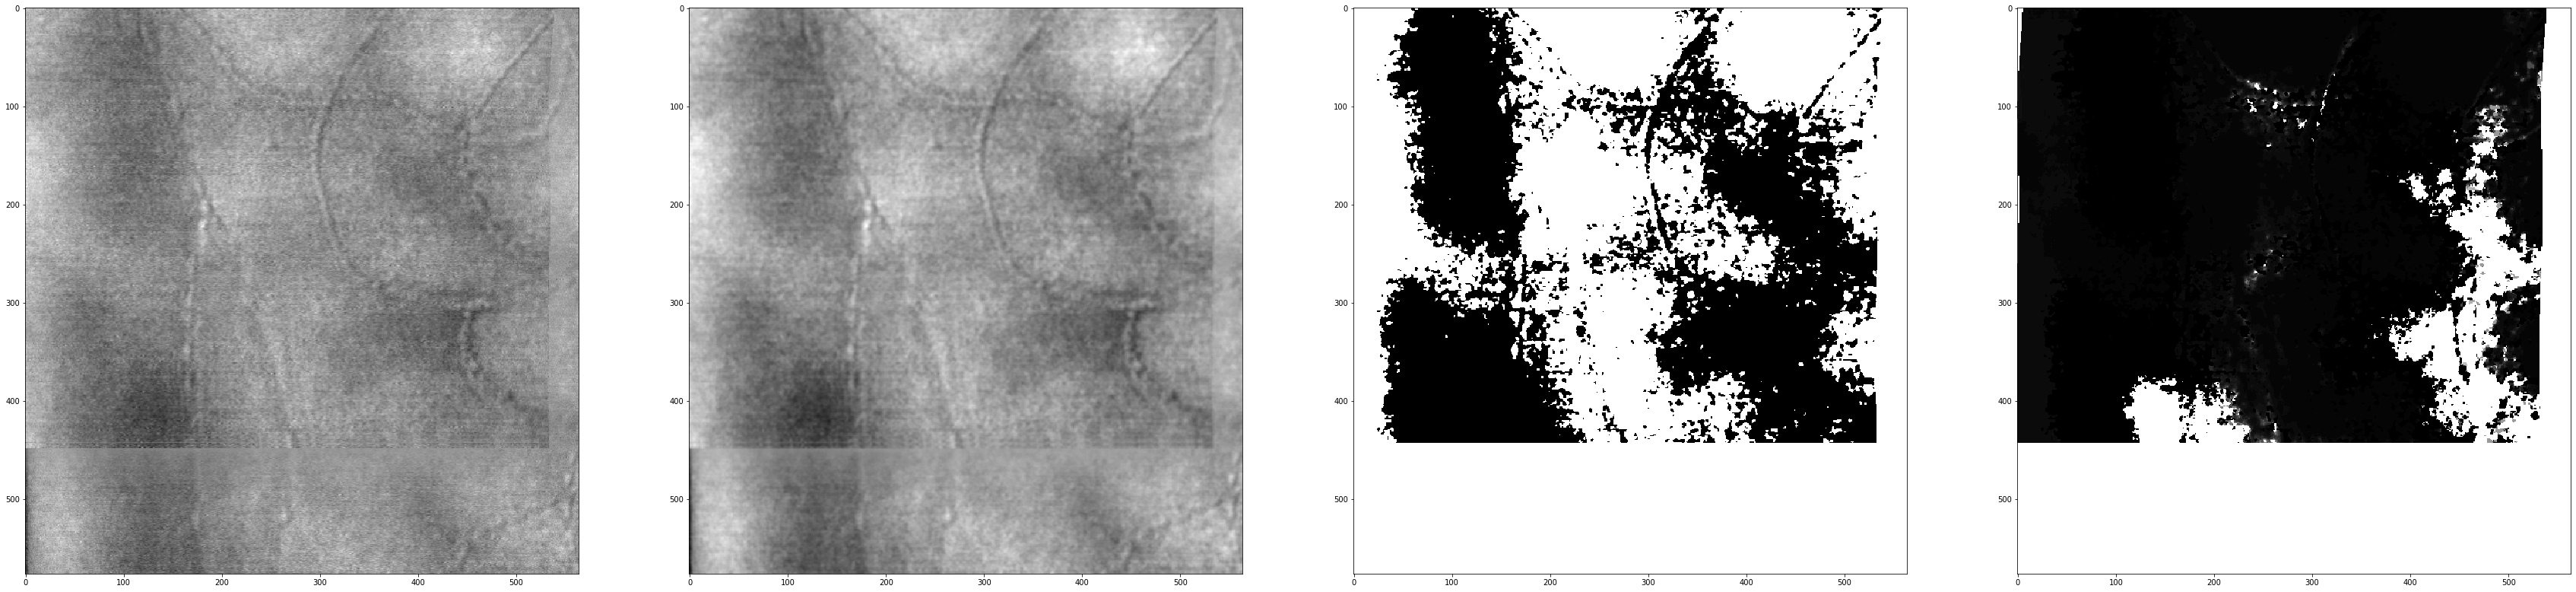

In [25]:
frames = vs.frames_oa790.copy()
mask_frames = vs.mask_frames_oa790[..., 0].copy()

fig, axes = plt.subplots(1, 4, figsize=(60, 60))

sigma = 1
axes[0].imshow(frames[0, ...], cmap='gray')

for i, frame in enumerate(frames):
    frames[i, ...] = mh.gaussian_filter(frame, sigma)
axes[1].imshow(frames[0, ...], cmap='gray')

# We invert the mask because True values mean that the values are masked and therefor invalid
# https://numpy.org/doc/stable/reference/maskedarray.generic.html
masked_frames = np.ma.masked_array(frames, ~mask_frames)
for i, masked_frame in enumerate(masked_frames):
    masked_frames[i, ...] = masked_frame / np.ma.mean(masked_frame)
axes[2].imshow(masked_frames[0, ...], cmap='gray')
  
m = np.ma.mean(masked_frames, axis=0)
for i, masked_frame in enumerate(masked_frames):
    masked_frames[i, ...] = masked_frame / m
axes[3].imshow(masked_frames[0, ...], cmap='gray')

In [24]:
masked_frames.min()

0